In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read,write
from IPython.display import Audio
from numpy.fft import fft, ifft, fftfreq
import pandas as pd
from scipy import signal

/home/hogar/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
#pip install ffprobe

In [3]:
pip install pydub

^C
Traceback (most recent call last):
  File "/home/hogar/anaconda3/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/hogar/anaconda3/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/hogar/anaconda3/lib/python3.8/site-packages/pip/__main__.py", line 29, in <module>
    from pip._internal.cli.main import main as _main
  File "/home/hogar/anaconda3/lib/python3.8/site-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/home/hogar/anaconda3/lib/python3.8/site-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/home/hogar/anaconda3/lib/python3.8/site-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/home/hogar/anaconda3/lib/python3.8/site-pa

In [2]:
fold = '../Data/pruebas3/wav/'
files=[fold + '0grad_1.wav',fold + '0grad_2.wav',fold + '0grad_3.wav',fold + '0grad_4.wav',fold + '0grad_5.wav',
      fold + '60grad_1.wav',fold + '60grad_2.wav',fold + '60grad_3.wav',fold + '60grad_4.wav',fold + '60grad_5.wav',
      fold + '120grad_1.wav',fold + '120grad_2.wav',fold + '120grad_3.wav',fold + '120grad_4.wav',
       fold + '120grad_5.wav',fold + '180grad_1.wav',fold + '180grad_2.wav',fold + '180grad_3.wav',
      fold + '180grad_4.wav',fold + '180grad_5.wav',fold + '240grad_1.wav',fold + '240grad_2.wav',
      fold + '240grad_3.wav',fold + '240grad_4.wav',fold + '240grad_5.wav',fold + '300grad_1.wav',
      fold + '300grad_2.wav',fold + '300grad_3.wav',fold + '300grad_4.wav',fold + '300grad_5.wav']

fondo = fold+'ruido.wav'

In [111]:
grads = [0,60,120,180,240,300]

In [3]:
Audio(files[1])

# Previsualización, limpieza y normalización de datos

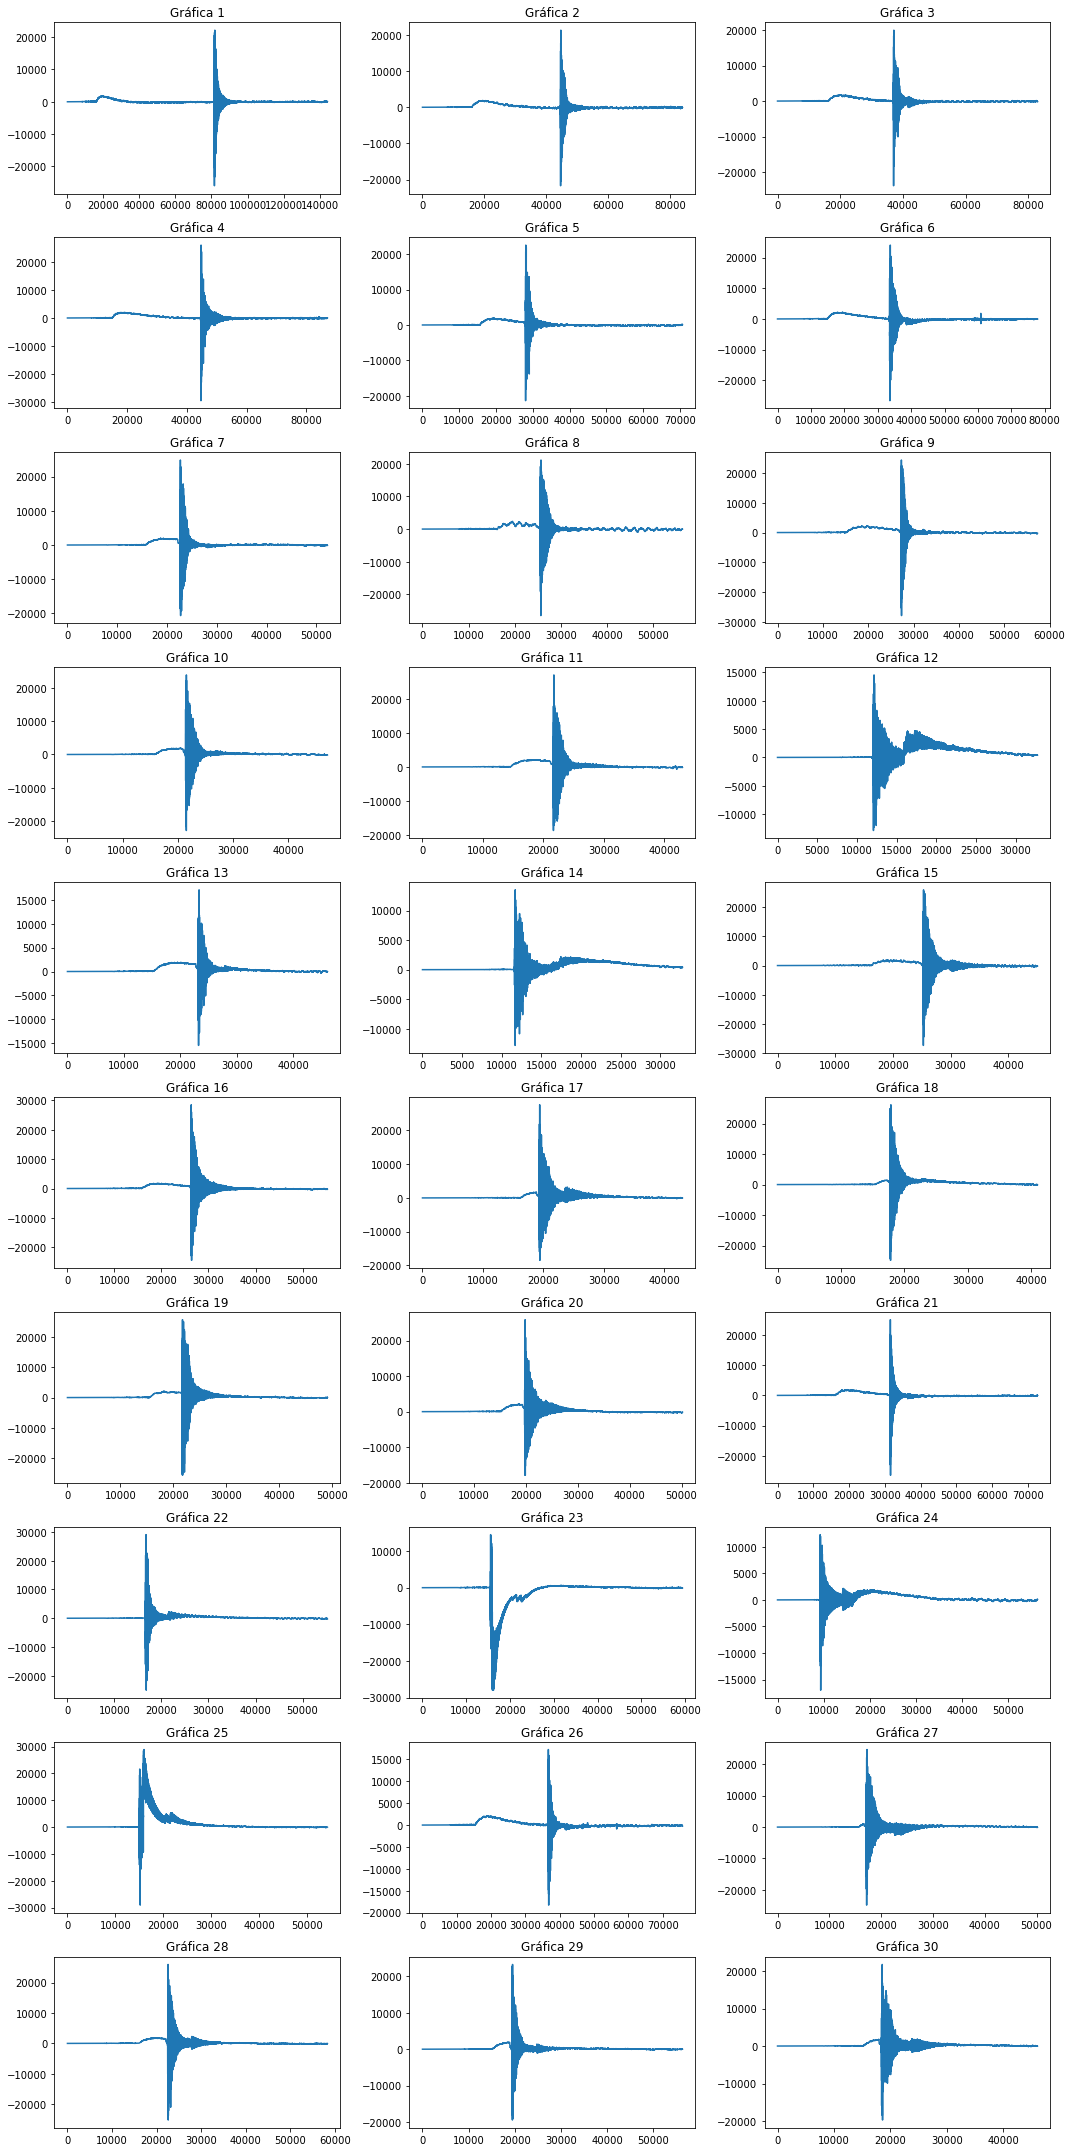

In [5]:
amp = []        
for i in range(0,len(files)): 
    Fs,data = read(files[i])
    amp.append(data[:,0])

        
fig, axs = plt.subplots(10, 3, figsize=(15, 30))

for i, amplitud in enumerate(amp):
    fila = i // 3
    columna = i % 3
    axs[fila, columna].plot(amplitud)
    axs[fila, columna].set_title(f'Gráfica {i+1}')

plt.tight_layout()
plt.show()

### Normalización

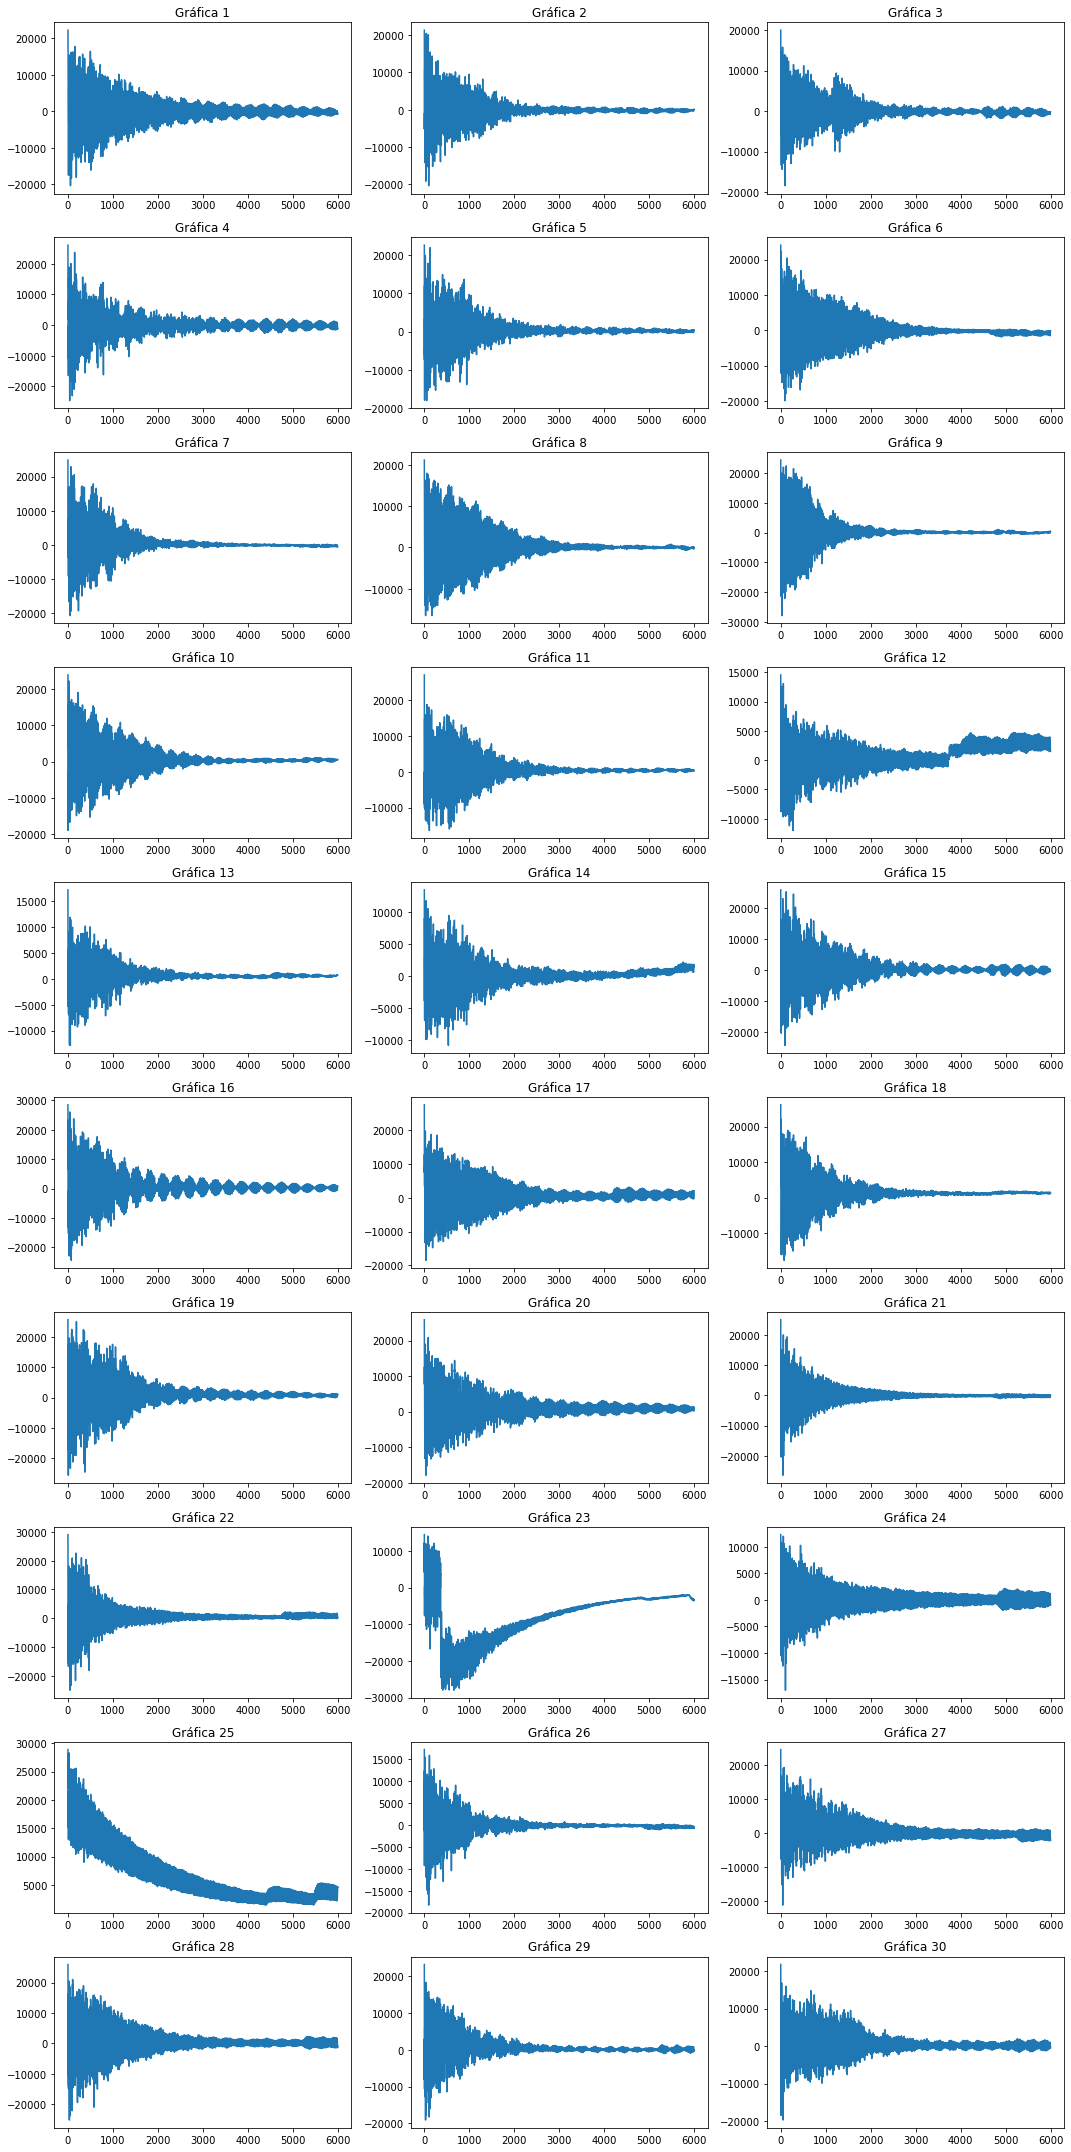

In [6]:
def normalize_pulses(pulses, pulse_duration):
    max_indexes = [np.argmax(pulse) for pulse in pulses]
    end_indexes = [index + pulse_duration for index in max_indexes]    
    max_end_index = max(end_indexes)    
    normalized_pulses = [pulse[index:min(max_end_index, index + pulse_duration)] for pulse, index in zip(pulses, max_indexes)]
    
    return normalized_pulses

interval = 6000

N_pulses = normalize_pulses(amp, interval)



fig, axs = plt.subplots(10, 3, figsize=(15, 30))

for i, amplitude_array in enumerate(N_pulses):
    fila = i // 3
    columna = i % 3
    axs[fila, columna].plot(amplitude_array)
    axs[fila, columna].set_title(f'Gráfica {i+1}')

plt.tight_layout()
plt.show()

En vista de los resultados serán omitidas las gráficas 12,23,25. De este modo tenemos:
* 0 grados: 5 muestras <br>
* 60 grados: 5 muestras <br>
* 120 grados: 4 muestras <br>
* 180 grados: 5 muestras <br>
* 240 grados: 3 muestras <br>
* 300 grados: 5 muetras <br>

In [7]:
for i in [11,22,24]:
    N_pulses[i] = False

In [191]:
def multi_graph(x_coords,y_coords,rows,cols,x_label,y_label,title,color='blue'):
    
    fig, axs = plt.subplots(rows, cols, figsize=(15, 10))
    fig.suptitle(title, fontsize=20)


    for i, (x,y) in enumerate(zip(x_coords,y_coords)):
        row = i // cols
        col = i % cols
        axs[row, col].plot(x,y,color=color)
        axs[row, col].set_title(f'{grads[i]}°',fontsize=15)
        axs[row,col].set_xlabel(x_label, fontsize=12)
        axs[row,col].set_ylabel(y_label, fontsize=12)


    plt.tight_layout()
    plt.show()

In [192]:
num_arrays = len(N_pulses)
group_size = 5
num_elements = len(N_pulses[0]) 
mean_pulses = []

for i in range(0, num_arrays, 5):
    group = N_pulses[i:i+group_size]  
    mean_array = np.zeros(num_elements)
    
    for array in group:
        mean_array += array
    
    mean_array /= len(group)
    
    mean_pulses.append(mean_array)

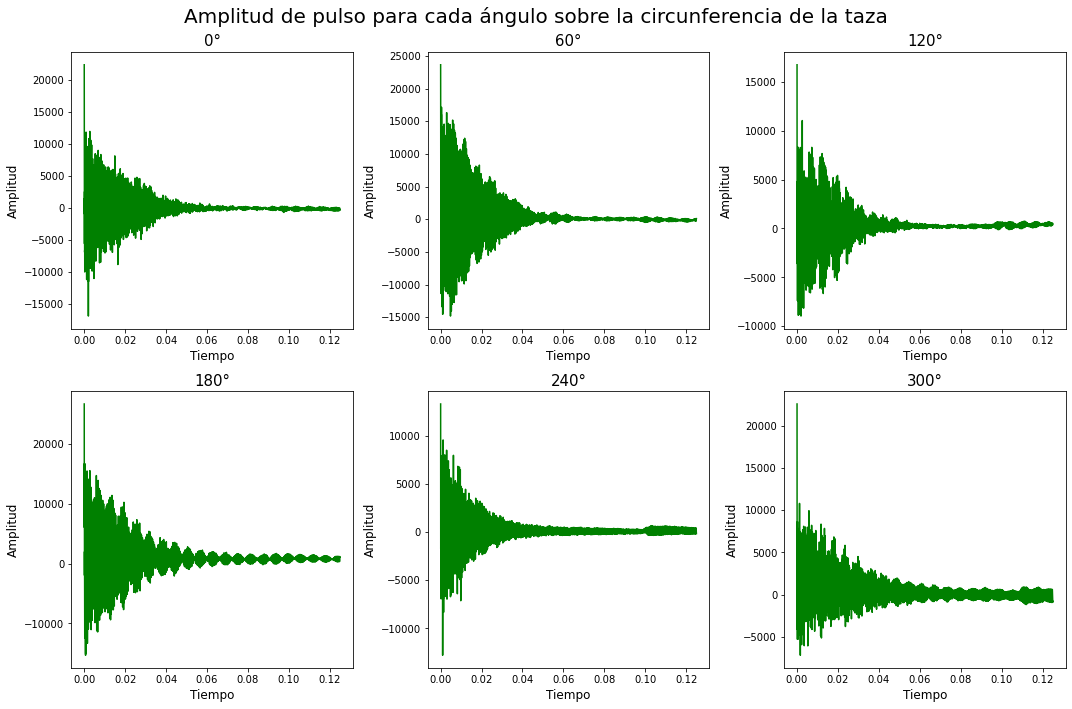

In [195]:
multi_graph([np.linspace(0,interval, interval)/Fs]*len(mean_pulses),mean_pulses,2,3,'Tiempo','Amplitud',
            'Amplitud de pulso para cada ángulo sobre la circunferencia de la taza','green')

# Análisis de Frecuencias

In [114]:
Fs, data = read(fondo)
ruido = data[:,0]
t_fondo = np.arange(0, len(ruido))/Fs

amplitud=[] 
times=[]

amp_fft=[] 
freq_fft =[]

        
for i in range(0,len(mean_pulses)): 
    fourier = fft(mean_pulses[i]) #transformada rápida de fourier de los datos
    freq = fftfreq(interval,1.0/Fs)
    pfreq = freq[:len(freq)//2]
    spectr = np.abs(fourier)[:len(freq)//2]

    freq_fft.append(pfreq)
    amp_fft.append(spectr)

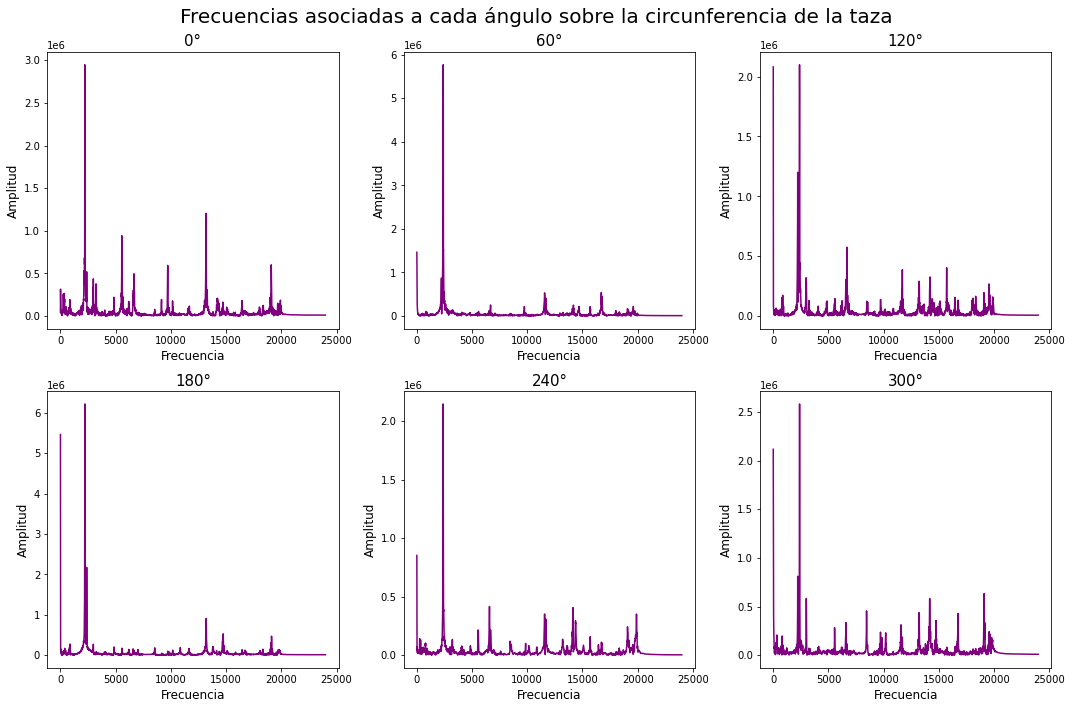

In [204]:
multi_graph(freq_fft,amp_fft,2,3,'Frecuencia',
            'Amplitud','Frecuencias asociadas a cada ángulo sobre la circunferencia de la taza','purple')

In [221]:
#Máximos de frecuencias
maxim = []
modes = []

for i in range(len(freq_fft)):
    indx_max_amp = np.argmax(amp_fft[i])
    maxim.append(freq_fft[i][indx_max_amp])

In [222]:
maxim

[2208.0, 2384.0, 2384.0, 2216.0, 2376.0, 2384.0]